## 9. GMM・DBSCAN

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### GMM


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,covariance_type='full')
y_gmm = gmm.fit_predict(X_std)

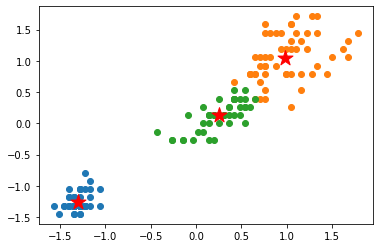

In [8]:
for i in np.unique(y_gmm):
    plt.scatter(X_std[y_gmm==i,2], X_std[y_gmm==i,3]);
plt.scatter(gmm.means_[:,2], gmm.means_[:,3], s=250, marker='*', c='red')

#### VBGMM
VBGMM(Variational Bayesian Gaussian Mixture)は、変分ベイズとGMMを組み合わせた手法であり、  
事前にクラスタ数を仮定せずに、クラスタ分析を行うことができる。  
VBGMMはEMアルゴリズムにベイズ推定を使用したものである。  
各クラスターのガウス分布の平均値と分散の最尤値でなく、その確率分布を求める。  
各確率分布の一番確率が高い値は、EMアルゴリズムで求まる値と一致します。  
またVBGMMはクラスタ数もベイズ推定を行う。  
クラスター数の事前分布にはDirichlet Process(ディリクレ過程)を使用します。

In [37]:
from sklearn.mixture import BayesianGaussianMixture

vbgmm = BayesianGaussianMixture(n_components=10, max_iter=1000) # 最大のクラスタ数を指定
y_vbgmm = vbgmm.fit_predict(X_std)

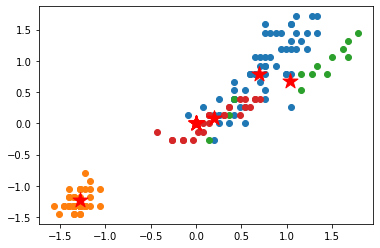

In [38]:
for i in np.unique(y_vbgmm):
    plt.scatter(X_std[y_vbgmm==i,2], X_std[y_vbgmm==i,3]);
plt.scatter(vbgmm.means_[:,2], vbgmm.means_[:,3], s=250, marker='*', c='red')

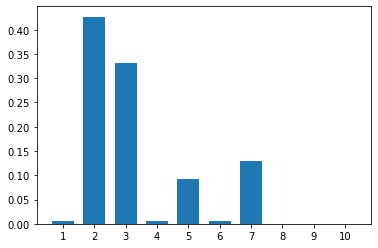

In [39]:
x_tick =np.array([1,2,3,4,5,6,7,8,9,10])
plt.bar(x_tick, vbgmm.weights_, width=0.7, tick_label=x_tick)
plt.show()

#### DBSCAN
DBSCAN(Density-based Spatial Clustering of Applications with Noise)は、  
密度ベースのクラスタリングであり、データ点の局所的な密度に基づいてクラスタラベルを割り当てる。  
次の条件に基づき各データ点にラベルを割り当てる。  
- 指定された半径$\epsilon$以内に少なくとも指定された個数(MinPts)の隣接点があるような点は、**コア点**とみなされる
- 半径$\epsilon$以内の隣接点の個数がMinPtsに満たないものの、コア点の半径$\epsilon$以内に位置するような点は**ボーダー点**と見なされる
- コア点でもボーダー点でもないその他の点はすべて**ノイズ点**と見なされる

その後の処理を以下に示す。
1. コア点ごとに、またはコア点の隣接関係に基づいて、別々のクラスタを形成する。  
コア点同士が隣接関係を持つのは、それらが$\epsilon$よりも離れていない場合である。
2. 各ボーダー点を、それと対となっているコア点のクラスタに割り当てる

<function matplotlib.pyplot.show(close=None, block=None)>

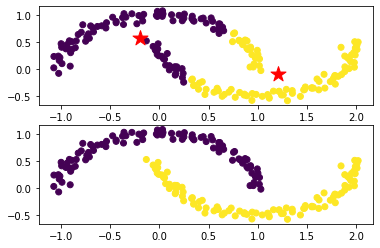

In [44]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets

X, z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
 
x=X[:,0]
y=X[:,1]

km = KMeans(n_clusters=2)
z_km = km.fit(X)

plt.subplot(2, 1, 1)
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show

km = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
z_km = km.fit(X)

plt.subplot(2, 1, 2)
plt.scatter(x,y, c=z_km.labels_)
plt.show